In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Mar  3 17:57:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%cd "/content/drive/MyDrive/Wheat Work/YOLO/yolo8m"

/content/drive/MyDrive/Wheat Work/YOLO/yolo8m


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

# Downaload the dataset

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="CZ5G1ljy5Egdidv9w210")
project = rf.workspace("albara-shehadeh-o8han").project("wheat-segmentation-nsndq")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


# Custom Training

In [ ]:
%cd "/content/drive/MyDrive/Wheat Work/YOLO/yolo8m"

/content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/YOLO/yolo8m


In [ ]:
!yolo task=segment mode=train model=yolov8m-seg.pt data="/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml" epochs=25 imgsz=640

New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visu

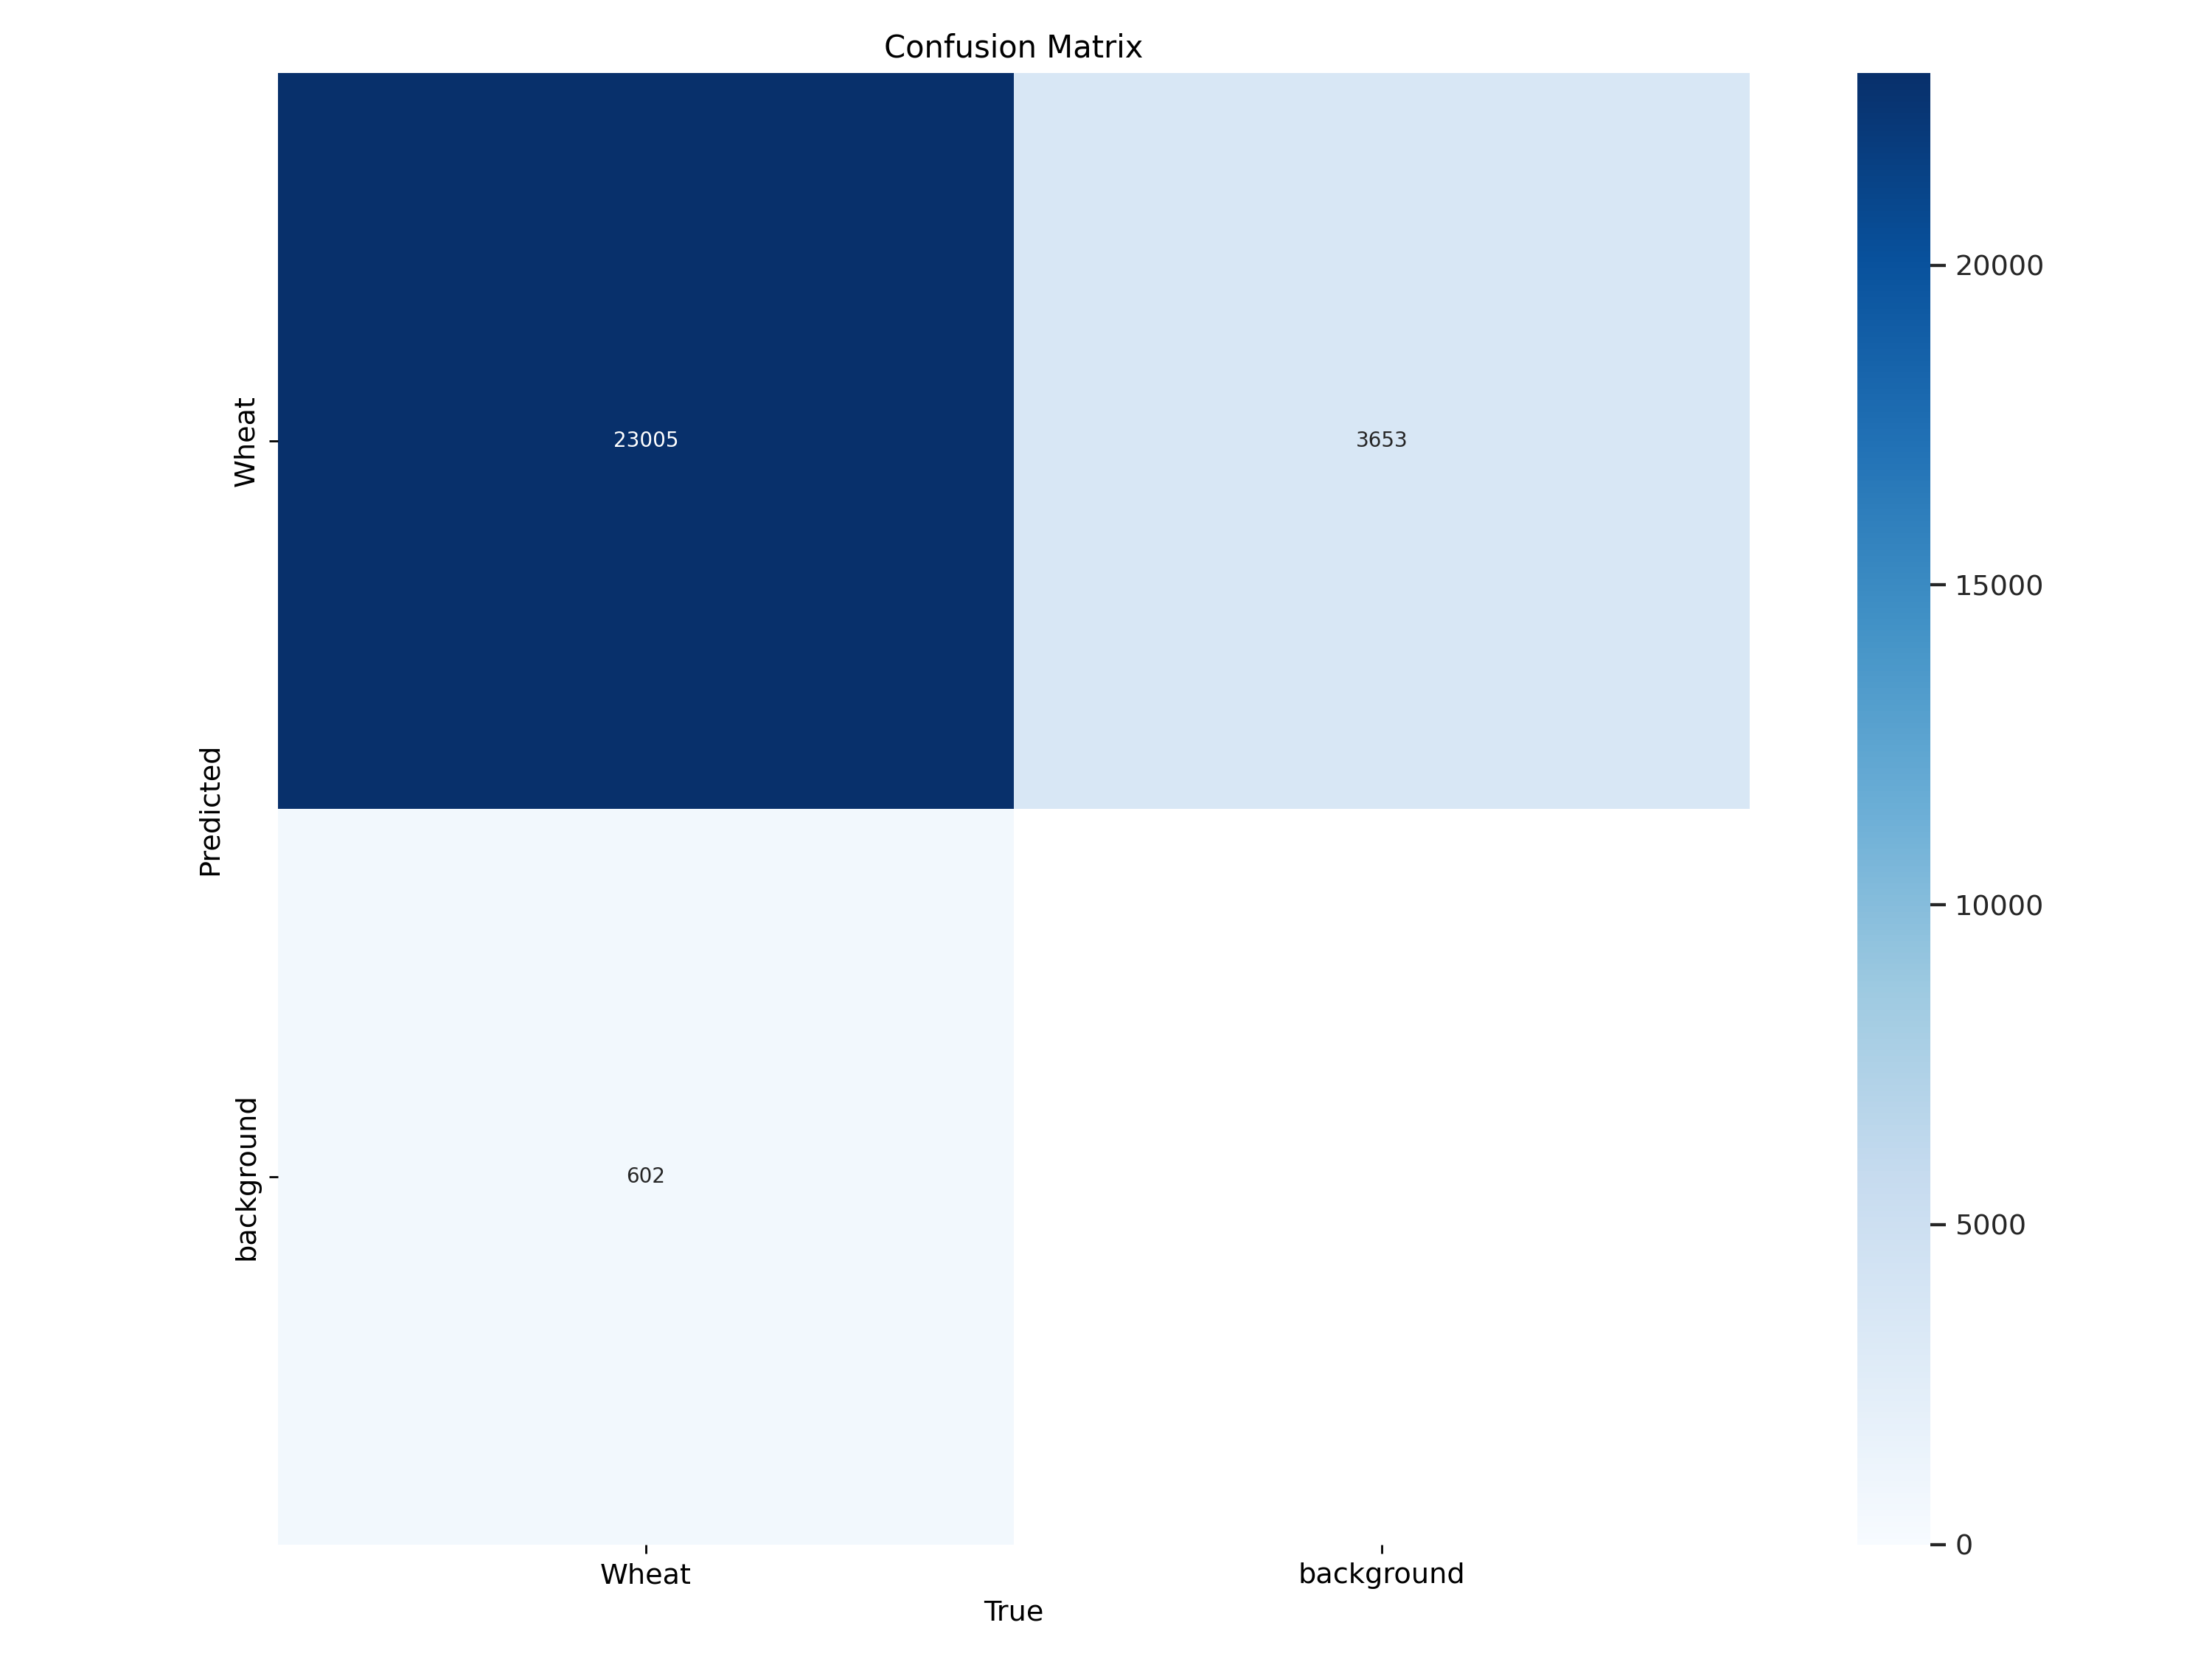

In [ ]:
Image(filename='runs/segment/train/confusion_matrix.png', width=600)

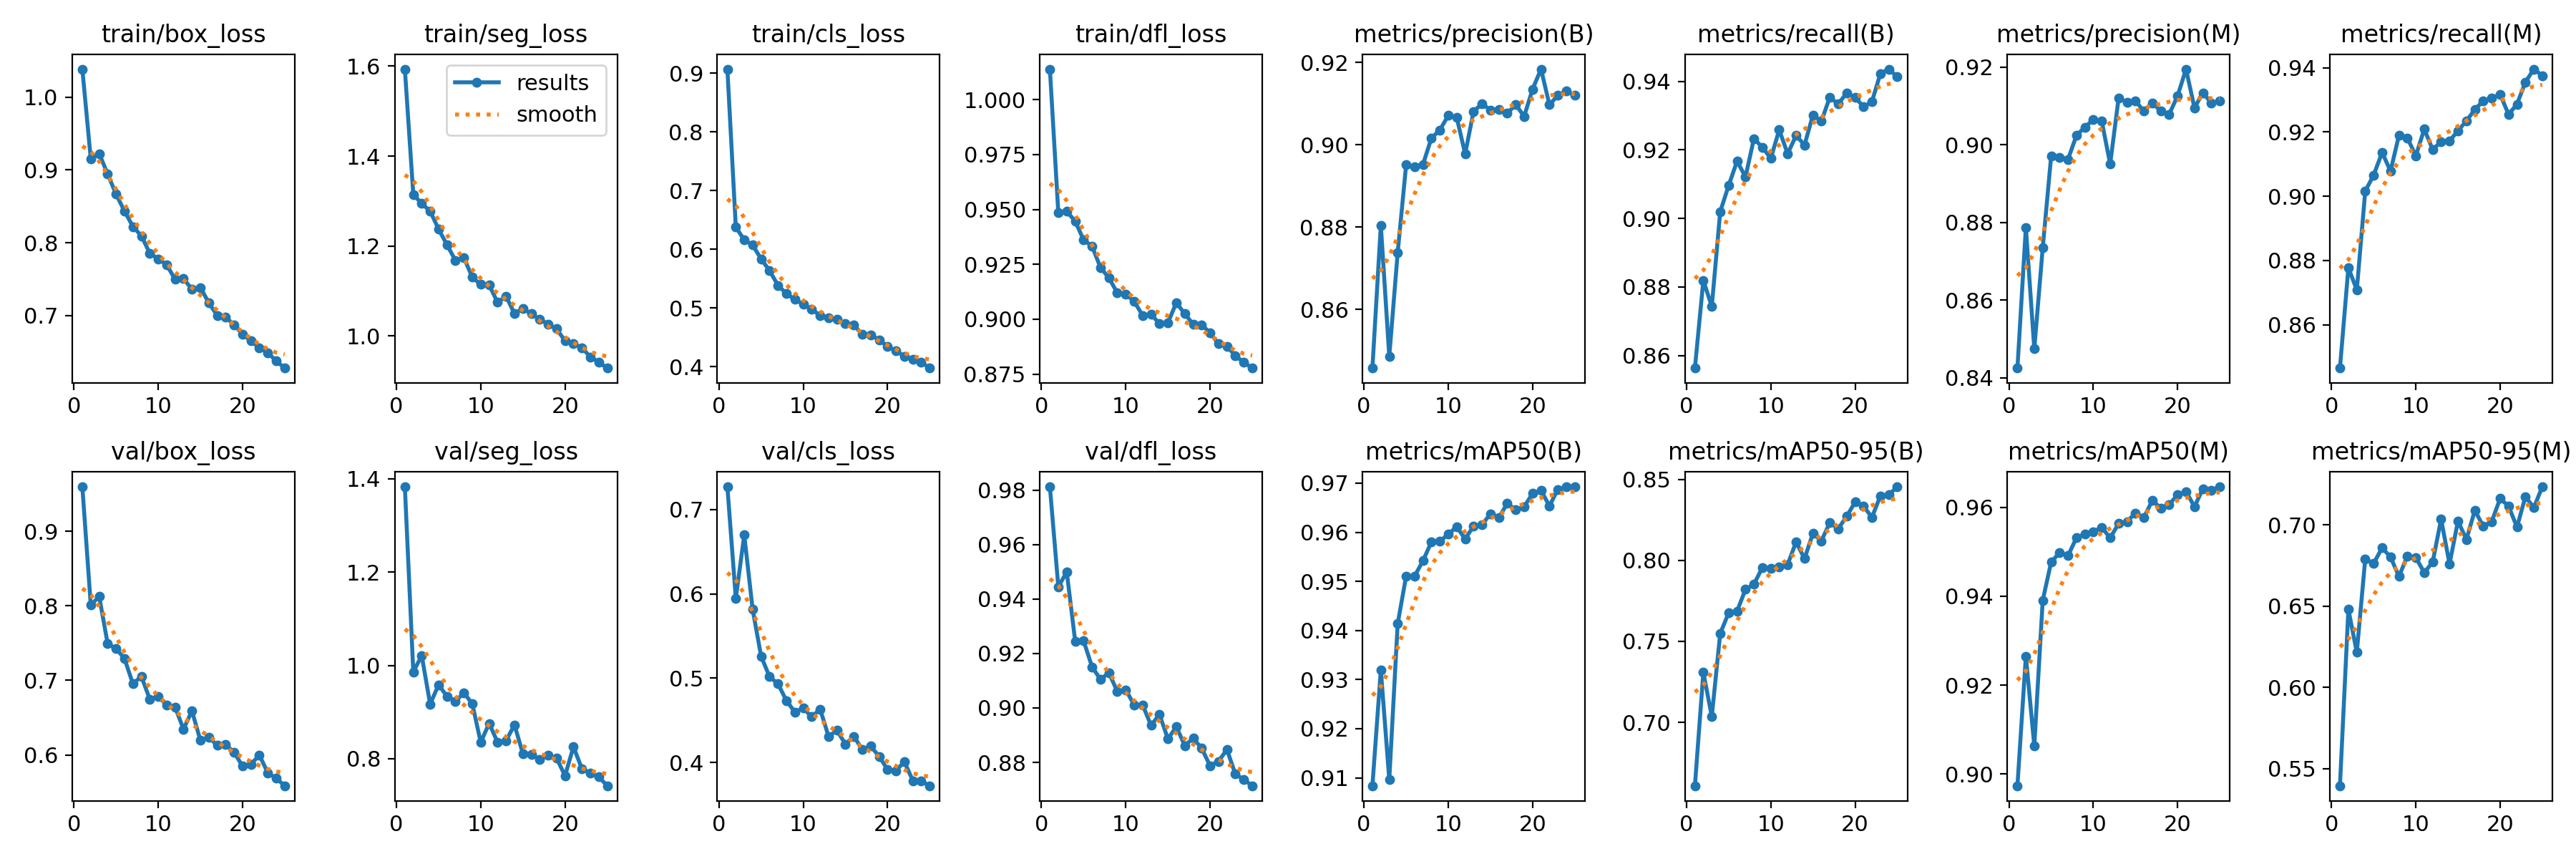

In [ ]:
Image(filename='runs/segment/train/results.png', width=600)

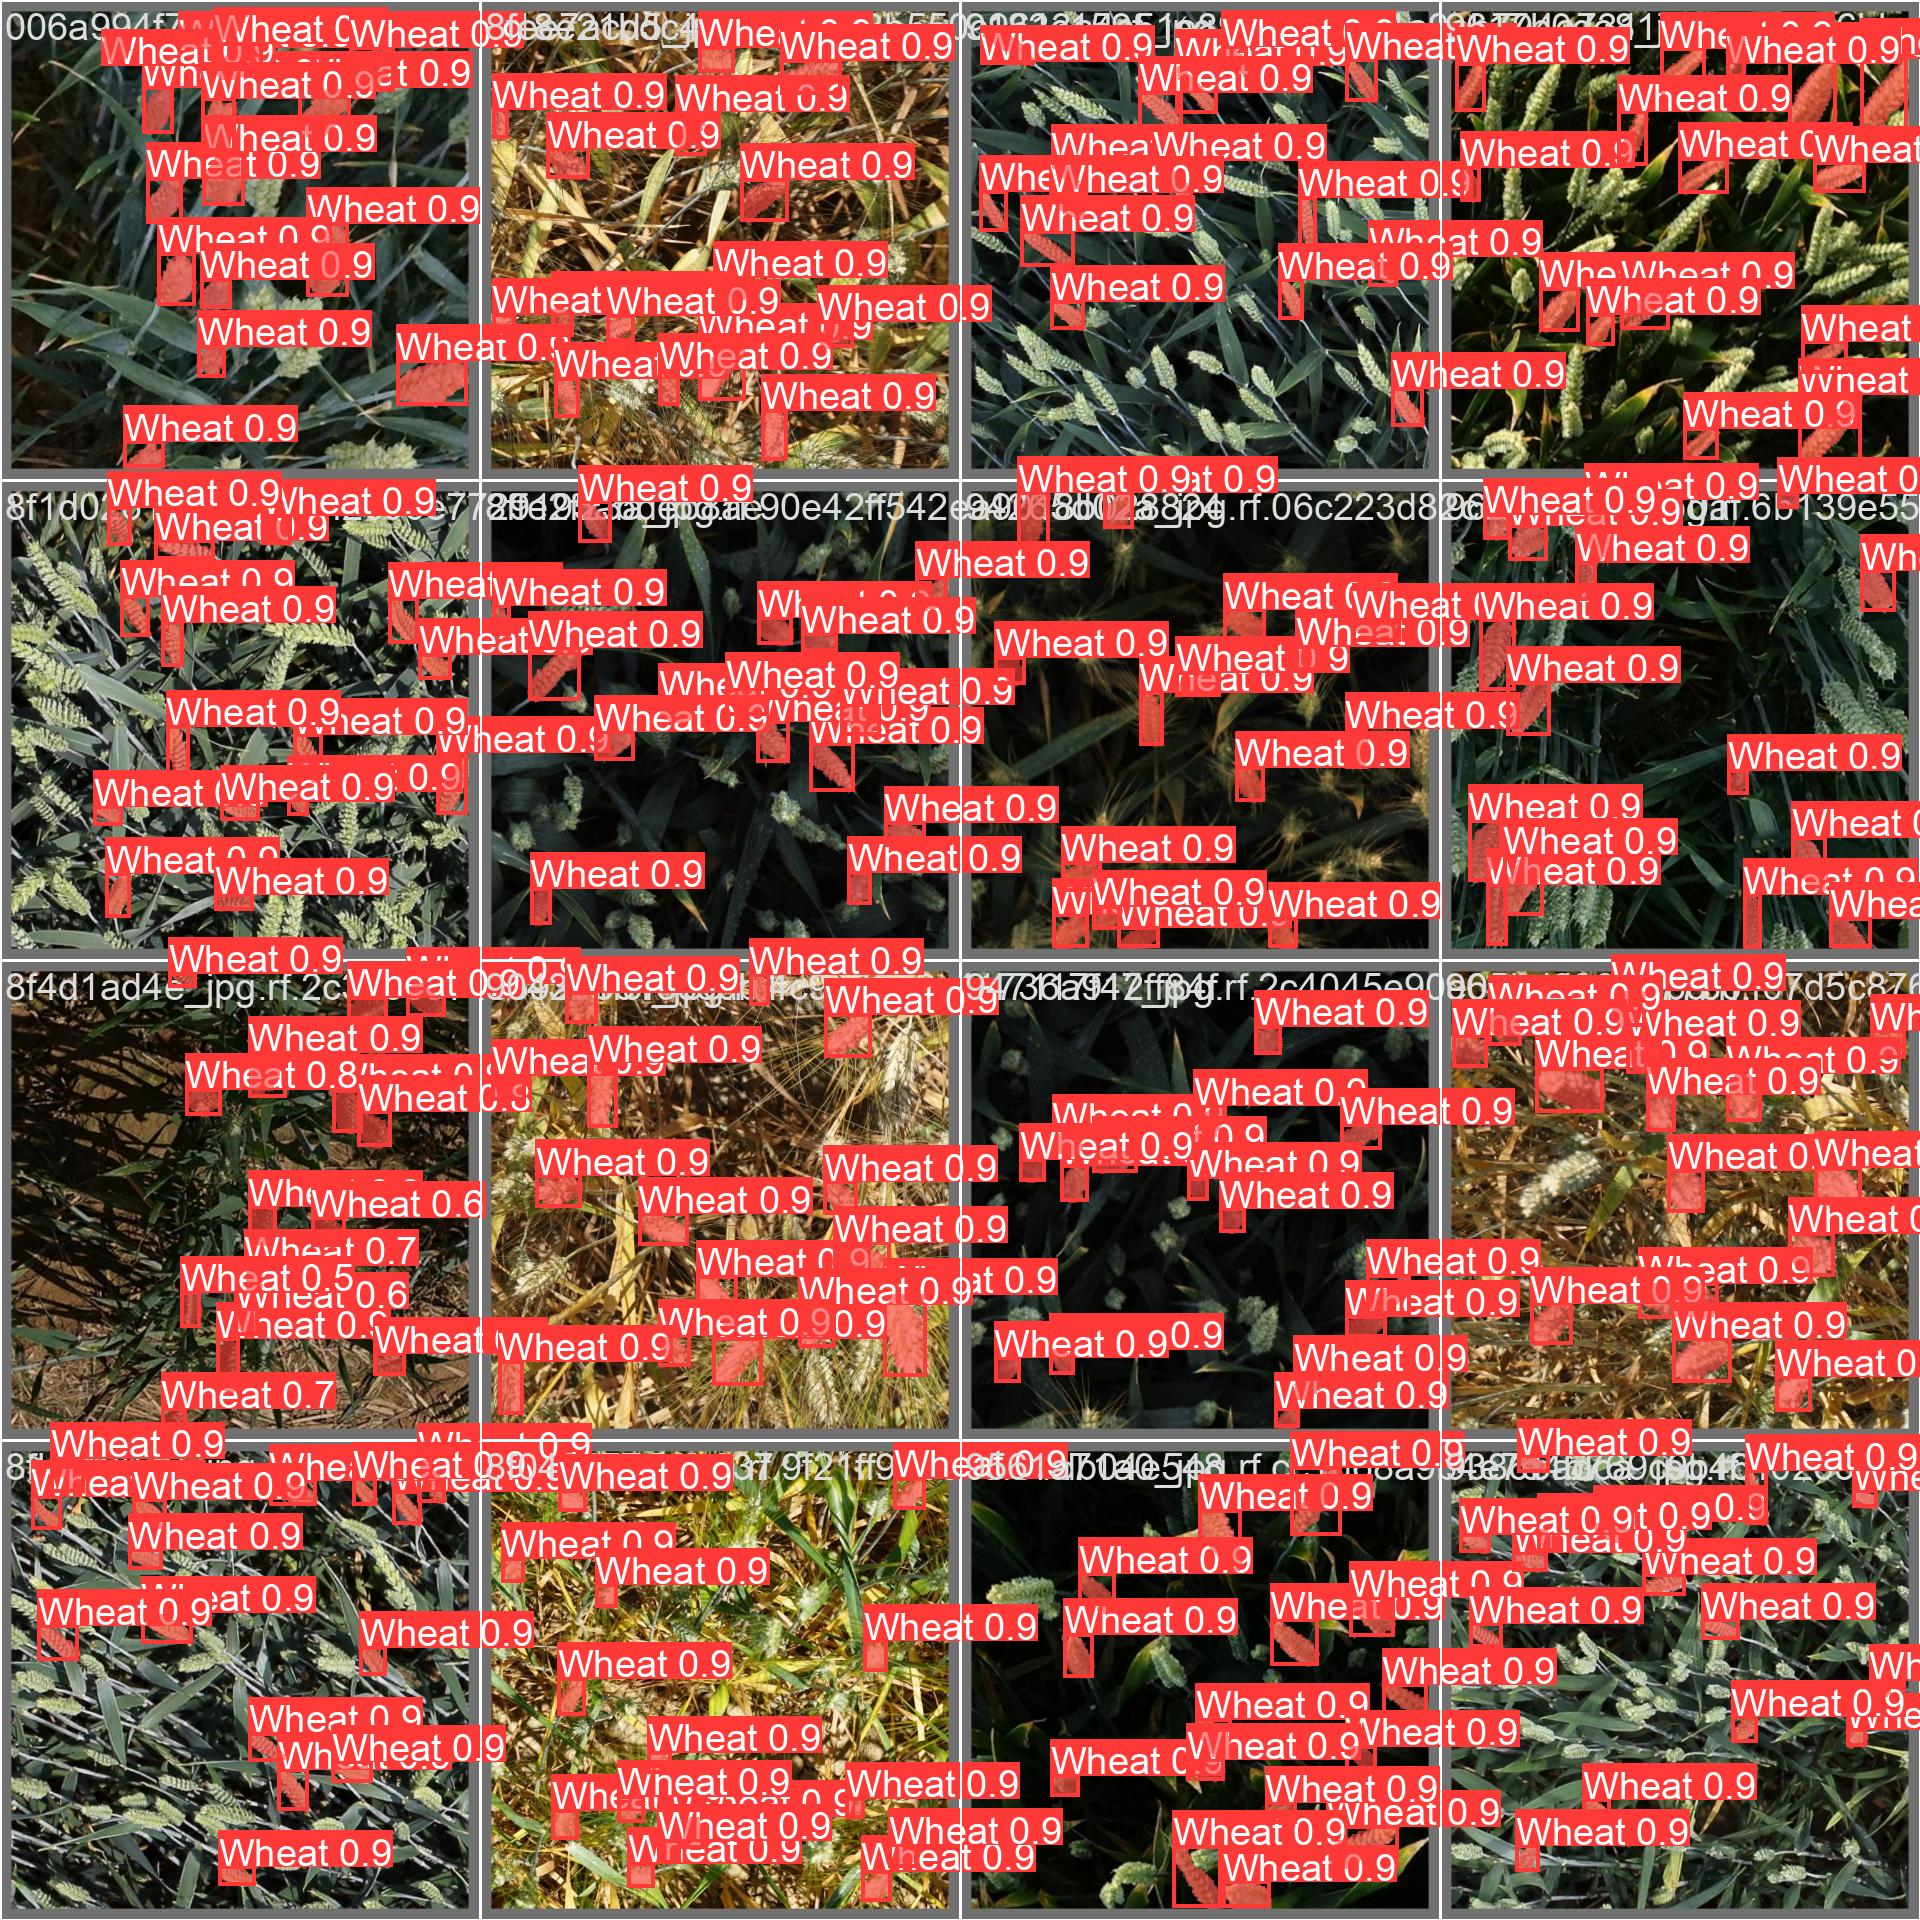

In [ ]:
Image(filename='runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=segment mode=val model="/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/runs/segment/train/weights/best.pt" data="/content/drive/MyDrive/Wheat Work/Albara-2/data.yaml"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
100% 755k/755k [00:00<00:00, 24.1MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/labels.cache... 598 images, 5 backgrounds, 0 corrupt: 100% 598/598 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/images/211487419_jpg.rf.3314b85d7a97f81655c0d20f42742d66.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1XylEiFp55LnN6GBfsgr-Gf8fyIHn-3fl/Wheat Work/Albara-2/valid/images/378966871_jpg.rf.ba4a6c325db09a9f43238c351cced1b6.jpg: 16 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 38/38 [19:08<00:00, 30.22s/it]
                 

## Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model="/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/runs/segment/train/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/Wheat Work/Albara-2/test/images" save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

image 1/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/2fd875eaa_jpg.rf.855cb3521f6b085bba1af3e785edb52a.jpg: 640x640 31 Wheats, 1507.8ms
image 2/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/348a992bb_jpg.rf.faf3ab0b14d044abe9acd4bdab6d6538.jpg: 640x640 37 Wheats, 1408.4ms
image 3/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51b3e36ab_jpg.rf.5fe64e31ac086e3e5845755e37a22690.jpg: 640x640 27 Wheats, 1401.5ms
image 4/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/51f1be19e_jpg.rf.d0ef4899aa765a7cbd8de168cb713120.jpg: 640x640 20 Wheats, 1432.1ms
image 5/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/53f253011_jpg.rf.28c441bfc9e6143c924f55b0ef8b6c66.jpg: 640x640 30 Wheats, 1372.3ms
image 6/10 /content/drive/MyDrive/Wheat Work/Albara-2/test/images/796707dd7_jpg.rf.19b

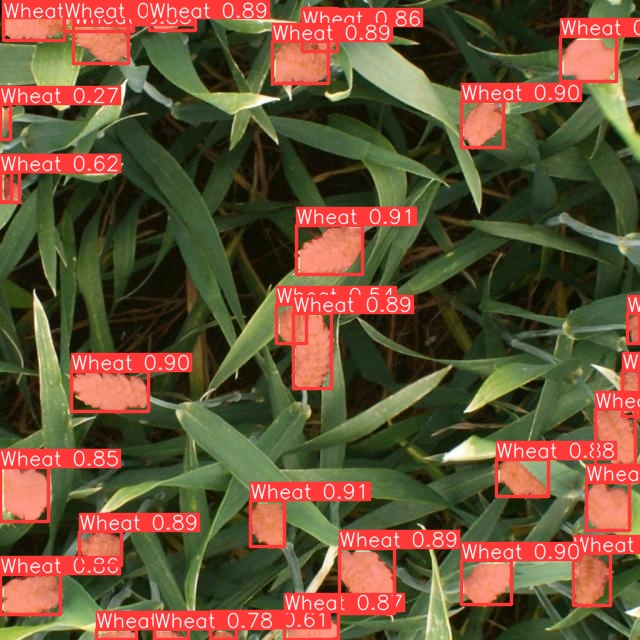

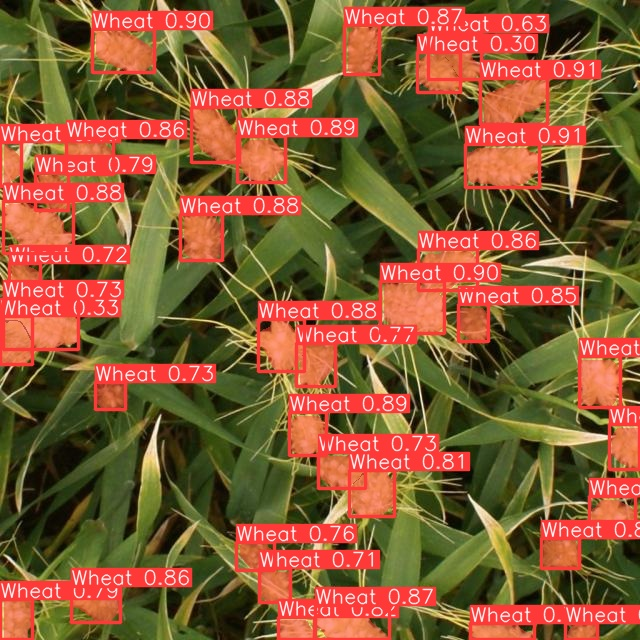

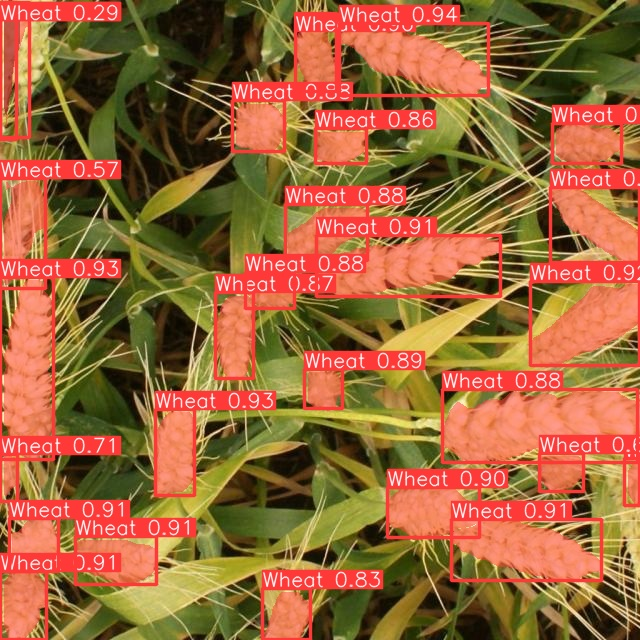

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=400))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
project.version(4).deploy(model_type="yolov8-seg", model_path="runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/albara-shehadeh-o8han/wheat-segmentation-nsndq/4
Share your model with the world at: https://universe.roboflow.com/albara-shehadeh-o8han/wheat-segmentation-nsndq/model/4


# Deploy with OnnxRunTime

In [ ]:
!pip install onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import torch
from pytorch_darknet2onnx import pytorch_darknet2onnx

# Replace 'best.pt' with your actual Darknet YOLO checkpoint file
darknet_checkpoint = '/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/runs/segment/train/weights/best.pt'

# Load Darknet model
darknet_model = torch.load(darknet_checkpoint, map_location=torch.device('cuda'))

# Specify the output ONNX file path
onnx_path = '/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/runs/segment/train/weights/model.onnx'

# Convert Darknet YOLO model to ONNX format
pytorch_darknet2onnx.convert(darknet_model, onnx_path, input_size=(640, 640))

ModuleNotFoundError: No module named 'pytorch_darknet2onnx'

In [ ]:
import torch
import onnx

# Load the YOLOv8 model
model_path = '/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/runs/segment/train/weights/best.pt'
model = torch.load(model_path, map_location=torch.device('cpu'))['model'].float()  # Adjust as needed

# Convert the model to evaluation mode
model.eval()

# Create dummy input with the same data type as the model's weights
dummy_input = torch.randn(1, 3, 640, 640)  # Assuming 3 color channels, 640x640 resolution

# Export the model to ONNX format
onnx_path = "/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/wheat_segmentation_model.onnx"
torch.onnx.export(model, dummy_input, onnx_path, input_names=['input'], output_names=['output'])

In [ ]:
# Load the ONNX model
onnx_model = onnx.load(onnx_path)

# # Print the ONNX model graph
# print(onnx.helper.printable_graph(onnx_model.graph))

# Print the shape of the ONNX model input and output
input_shape = onnx_model.graph.input[0].type.tensor_type.shape.dim
output_shape = onnx_model.graph.output[0].type.tensor_type.shape.dim

print("ONNX Model Input Shape:", [dim.dim_value for dim in input_shape])
print("ONNX Model Output Shape:", [dim.dim_value for dim in output_shape])

ONNX Model Input Shape: [1, 3, 640, 640]
ONNX Model Output Shape: [1, 37, 8400]


In [ ]:
# # print("Expected input shape:", ort_session.get_inputs()[0].shape)
# dummy_input = torch.randn((1, 3, 640, 640))  # Assuming 3 channels and 640x640 resolution
# dummy_input = dummy_input.unsqueeze(0)  # Add batch dimension

In [ ]:
# import numpy as np
# import onnx
# import torch
# import onnxruntime

# onnx_model_path = "/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/wheat_segmentation_model.onnx"
# onnx_model = onnx.load(onnx_model_path)
# onnx.checker.check_model(onnx_model)

# # Print the expected input shape
# print("Expected input shape:", ort_session.get_inputs()[0].shape)

# ort_session = onnxruntime.InferenceSession(onnx_model_path, providers=["CPUExecutionProvider"])

# # compute ONNX Runtime output prediction
# ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
# ort_outs = ort_session.run(None, ort_inputs)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(dummy_input), ort_outs[0], rtol=1e-03, atol=1e-05)

# print("Exported model has been tested with ONNXRuntime, and the result looks good!")

In [ ]:
!pip install onnxruntime-tools

In [ ]:
print(dummy_input.shape)

torch.Size([1, 3, 640, 640])


In [ ]:
print(ort_outs[0].shape)

(1, 37, 8400)


In [ ]:
# !pip install ultralytics
# !pip install onnxruntime
# !pip install opencv-python
# !pip install numpy
# !pip install pillow

In [ ]:
from PIL import Image
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt

# Prepare input image
img = Image.open("/content/drive/MyDrive/Wheat Work/Albara-2/test/images/2fd875eaa_jpg.rf.855cb3521f6b085bba1af3e785edb52a.jpg")
img_width, img_height = img.size
img = img.convert("RGB")
img = img.resize((640, 640))

input = np.array(img)
input = input.transpose(2, 0, 1)
input = input.reshape(1, 3, 640, 640).astype("float32")
input = input / 255.0

# Run the model
model = onnxruntime.InferenceSession("/content/drive/MyDrive/Wheat Work/YOLO/yolo8m/wheat_segmentation_model.onnx")
outputs = model.run(None, {"input": input})

# Display the output
output_image = outputs[0][0]
output_image = (output_image * 255).astype(np.uint8)

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.